In [1]:
from ner.llm_ner.ResultInstance import load_all_results
%reload_ext autoreload
%autoreload 2

load_all_results()

[nltk_data] Downloading package stopwords to /home/ketl2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ketl2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ketl2/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
2023-11-07 08:34:00.346101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 08:34:01.119459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/ketl2/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  

,f1_mean,f1_conf_inter,precision_mean,precision_conf_inter,recall_mean,recall_conf_inter,model,prompt_technique,few_shot_tecnique,nb_few_shots,verifier,len_data_train,len_data_test,nb_test_run,confidence_interval,distribution_used
0,0.923,"(0.877, 0.969)",0.919,"(0.831, 1.007)",0.873,"(0.800, 0.946)",mistral-7b-v0.1-ft-discussion-2000-Q5_0,discussion,entity,5,None,1538,50,3,0.95,Student
1,0.888,"(0.840, 0.935)",0.875,"(0.839, 0.911)",0.827,"(0.772, 0.883)",mistral-7b-v0.1-ft-discussion-2000-Q5_0,discussion,sentence,5,None,1538,50,3,0.95,Student
2,0.886,"(0.844, 0.928)",0.865,"(0.822, 0.908)",0.825,"(0.770, 0.880)",mistral-7b-v0.1-ft-discussion-2000-Q5_0,discussion,random,5,None,1538,50,3,0.95,Student
7,0.691,"(0.631, 0.751)",0.632,"(0.585, 0.678)",0.446,"(0.382, 0.511)",mistral-7b-v0.1,<>,sentence,5,None,1538,50,3,0.95,Student
4,0.591,"(0.511, 0.671)",0.450,"(0.300, 0.600)",0.358,"(0.254, 0.462)",llama-2-13b,<>,sentence,5,None,1538,50,3,0.95,Student
6,0.571,"(0.385, 0.757)",0.523,"(0.316, 0.730)",0.385,"(0.338, 0.432)",mistral-7b-v0.1,<>,entity,5,None,1538,50,3,0.95,Student
3,0.506,"(0.412, 0.599)",0.462,"(0.235, 0.689)",0.275,"(0.236, 0.314)",llama-2-13b,<>,entity,5,None,1538,50,3,0.95,Student
8,0.475,"(0.324, 0.627)",0.377,"(0.314, 0.440)",0.308,"(0.201, 0.414)",mistral-7b-v0.1,<>,random,5,None,1538,50,3,0.95,Student
5,0.351,"(0.233, 0.469)",0.414,"(0.069, 0.760)",0.223,"(0.178, 0.267)",llama-2-13b,<>,random,5,None,1538,50,3,0.95,Student


In [10]:
from ner.utils import load

res = load("ner/saves/results/conll2003_cleaned/mistral-7b-v0.1-ft-discussion-2000-Q5_0/discussion/sentence_5_None_1538_50.pkl")

In [33]:
r = res.res_insts[2]

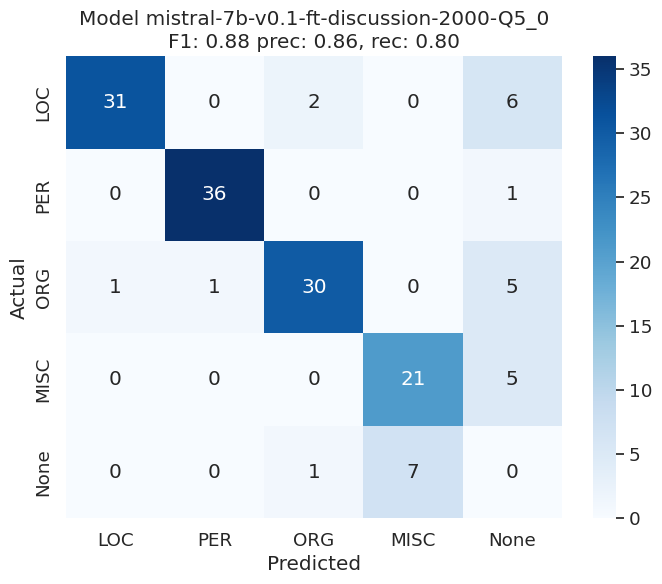

0
[['Milan', 'ORG']]
[('Milan', 'LOC')]
--------------------------------------------
1
[['ALBANIA', 'LOC'], ['N.IRELAND', 'LOC']]
[('SOCCER', 'MISC'), ('ALBANIA', 'LOC'), ('N.IRELAND', 'LOC')]
--------------------------------------------
2
[]
[('skinheads', 'MISC')]
--------------------------------------------
3
[['New York Stock Exchange', 'ORG'], ['Newmonth', 'ORG'], ['Santa Fe', 'ORG']]
[('Santa Fe', 'ORG'), ('Newmonth', 'ORG')]
--------------------------------------------
4
[['London', 'LOC'], ['Dean Sturridge', 'PER'], ['Darryl Powell', 'PER'], ['Arsenal', 'ORG'], ['Tony Adams', 'PER']]
[('Arsenal', 'ORG'), ('Tony Adams', 'PER'), ('Dean Sturridge', 'PER'), ('Darryl Powell', 'PER'), ('London', 'LOC')]
--------------------------------------------
5
[['Reuters', 'ORG'], ['State Law and Order Restoration Council', 'ORG'], ['SLORC', 'ORG']]
[('State Law and Order Restoration Council', 'ORG'), ('SLORC', 'ORG'), ('Reuters', 'ORG')]
--------------------------------------------
6
[['Geneva

In [34]:
r.show_cm()
r.analyse_results()

In [24]:
r.f1

0.9248448497571303

In [26]:
from ner.Datasets.Conll2003Dataset import load_conll_dataset
data = load_conll_dataset(cleaned = True)
[(d['text'], d['spans']) for d in data if 'Hansenne' in d['text']]

In [32]:
[(d['text'], d['spans']) for d in data if 'Hansenne' in d['text']]

[('Bill Jordan , general secretary of the International Confederation of Free Trade Unions ( ICFTU ) , told a news conference the withdrawal of a WTO invitation to ILO director general Michel Hansenne was " outrageous behaviour on the part of an organisation that wants to command respect in the world " .',
  [['Bill Jordan', 'PER'],
   ['International Confederation of Free Trade Unions', 'ORG'],
   ['ICFTU', 'ORG'],
   ['WTO', 'ORG'],
   ['ILO', 'ORG'],
   ['Michel Hansenne', 'PER']]),
 ('Jordan said a small group of developing nations that oppose linking trade talks and labour conditions had pressured World Trade Organisation ( WTO ) officials to prevent Hansenne from taking the platform to urge such links .',
  [['Jordan', 'PER'], ['World Trade Organisation', 'ORG'], ['WTO', 'ORG']])]